In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 50)

In [2]:
# Load Data
data = pd.read_csv("../data/raw/Training Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [3]:
data.sample(5)

Id   Income  Age  Experience Married/Single House_Ownership  \
124359  124360  9934516   66           6         single          rented   
166356  166357  1198023   44           7         single          rented   
57621    57622  4209616   55           8         single          rented   
25821    25822   254930   69           0         single           owned   
40426    40427  7642419   39          12        married          rented   

       Car_Ownership          Profession         CITY        STATE  \
124359           yes       Hotel_Manager    Chinsurah  West_Bengal   
166356            no           Librarian   Kumbakonam   Tamil_Nadu   
57621             no   Chemical_engineer    Ahmedabad      Gujarat   
25821             no             Aviator  Nangloi_Jat        Delhi   
40426             no  Petroleum_Engineer     Agartala      Tripura   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
124359                6                 14          0  
166356                3                 12          0  
57621                 6                 11          0  
25821                 0                 11          0  
40426                12                 10          0

In [4]:
# Check number of unique counts for each column
data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [5]:
# Renaming columns
columns = data.columns.str.lower()
data.columns = columns
data = data.rename(columns={"married/single":"marital_status"})
data.head()

id   income  age  experience marital_status house_ownership car_ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            profession                 city           state  current_job_yrs  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   current_house_yrs  risk_flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [6]:
# Defining column types
numerical_columns = ["income","age","experience","current_job_yrs","current_house_yrs"]
categorical_columns = ["marital_status", "house_ownership","car_ownership","profession","city","state","risk_flag"]

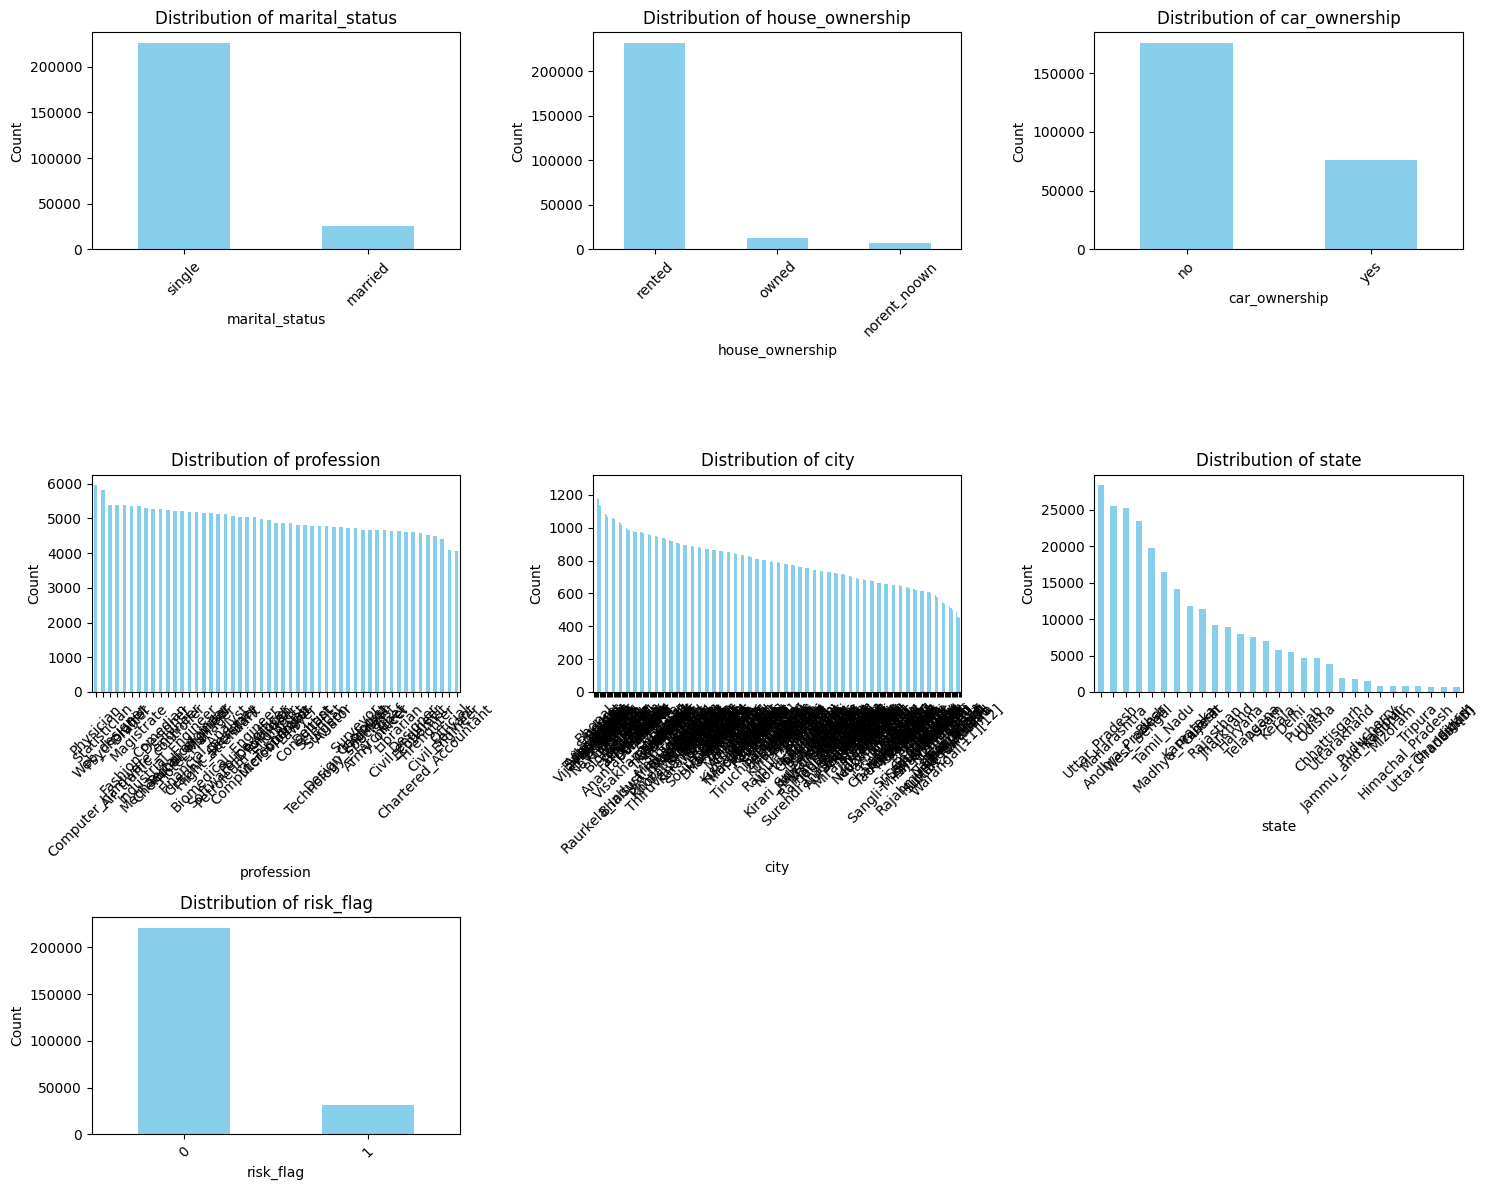

In [ ]:
# Plotting Categorical Data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid for subplots (we'll leave one empty)
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, col in enumerate(categorical_columns):
    ax = axes[i]  
    value_counts = data[col].value_counts() 
    
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

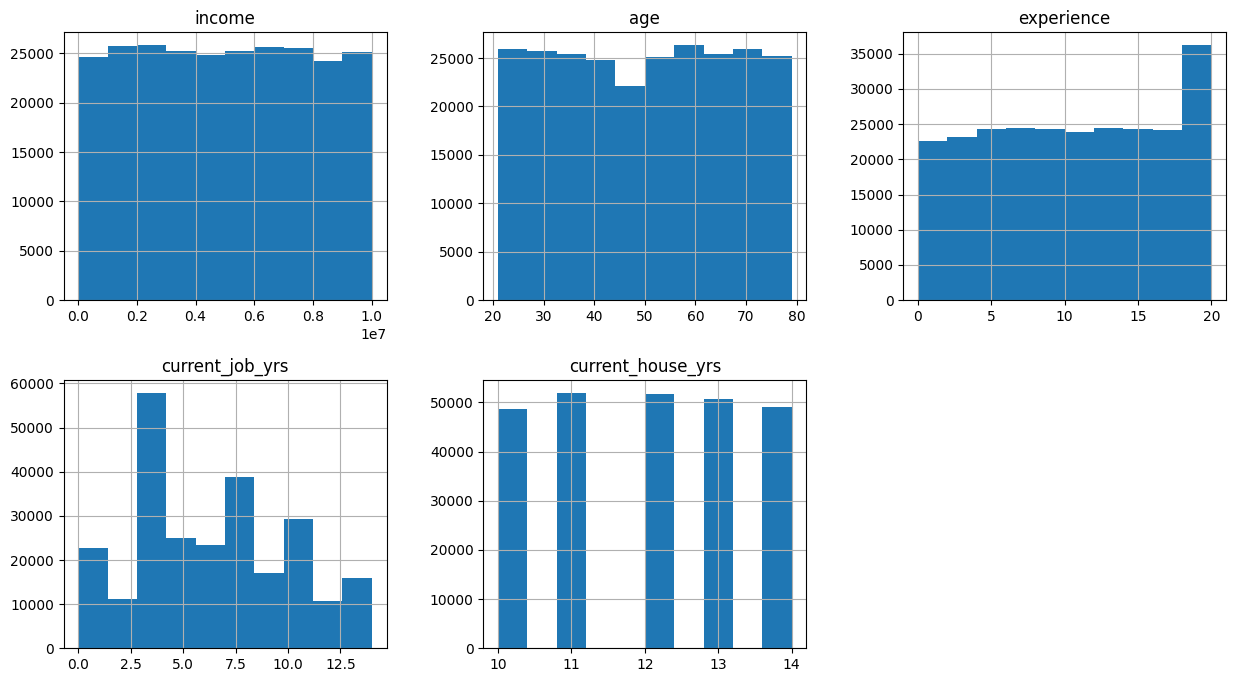

In [8]:
# Exploring Numerical Columns
data[numerical_columns].hist(figsize=(15,8), layout=(2,3))
plt.show()

## Categorical Data Exploration

Relationships to Explore
- city and state 
- risk to other categorical columns

In [15]:
# risk by state
fig = px.histogram(data, x = "state", color="risk_flag", text_auto=True, title="Risk by State")
fig.show()

## Numerical Data Exploration